In [3]:
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [59]:
np.random.seed(42)

$f(x, y) = \sin^2 x + \sin^2 y$ 

### Градиентный спуск для функции $f(x, y)$ 

In [60]:
def f(x: np.array(np.float)) -> np.float():
    return np.sum(np.sin(x)**2)

/tmp/ipykernel_7060/1129942697.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def f(x: np.array(np.float)) -> np.float():


In [61]:
def grad_f(x):
    """
    Градиент функции f, определенной выше.
    """
    return [np.sin(2*x[0]), np.sin(2*x[1])]

In [62]:
assert np.allclose(grad_f(np.array([1, 2])),
                   np.array([0.90929743, -0.7568025])), 'Что-то не так'
grad_f([1, 2])

[0.9092974268256817, -0.7568024953079282]

In [67]:
def grad_descent_2d(f, grad_f, lr: int, 
                    num_iter=100, x0=None) -> np.array:
    """
    функция, которая реализует градиентный спуск в минимум для функции f от двух переменных. 
        :param f: скалярная функция двух переменных
        :param grad_f: функция, возвращающая градиент функции f
        :param lr: learning rate алгоритма
        :param num_iter: количество итераций градиентного спуска
        :return: np.array[num_iter, 2] пар вида (x, f(x))
    """
    if x0 is None:
        x0 = np.random.random(2)
    #print(x0)
    
    # будем сохранять значения аргументов и значений функции
    # в процессе град. спуска в переменную history
    history = []
    
    # итерация цикла -- шаг градиентного спуска
    curr_x = x0.copy()
    for iter_num in range(num_iter):
        entry = np.hstack((curr_x, f(curr_x)))
        history.append(entry)
        
        curr_x -= lr * np.array(grad_f(curr_x))
        
    return np.vstack(history)

In [70]:
steps = grad_descent_2d(f, grad_f, lr=0.1, num_iter=20)

/tmp/ipykernel_7060/1990606052.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


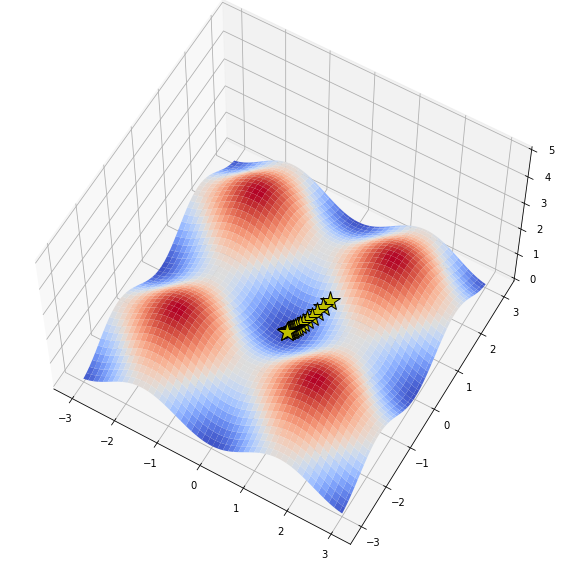

In [83]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np


path = []

X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection='3d')

zs = np.array([f(np.array([x,y]))
              for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)


ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, zorder=2)

ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
        marker="*", markersize=20, zorder=3,
        markerfacecolor='y', lw=3, c='black')

ax.set_zlim(0, 5)
ax.view_init(elev=60)
plt.show()

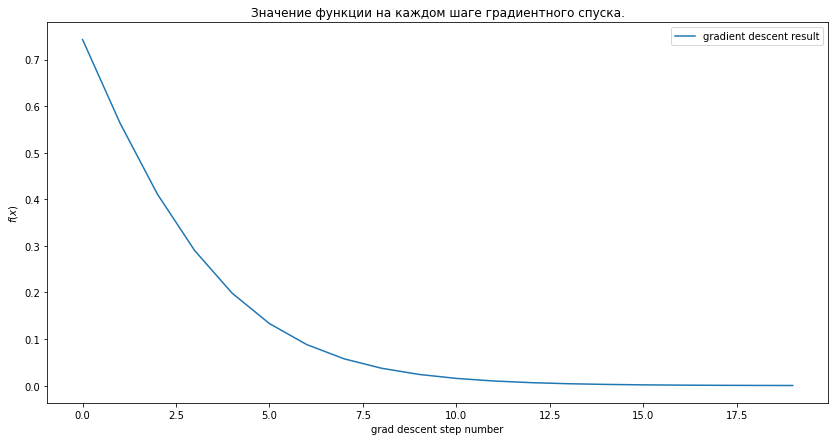

In [100]:
plt.figure(figsize=(14, 7))
plt.xlabel('grad descent step number')
plt.ylabel('$f(x)$')
plt.title('Значение функции на каждом шаге градиентного спуска.')

f_values = list(map(lambda x: x[2], steps))
plt.plot(f_values, label='gradient descent result')
plt.legend()

In [415]:
def generate_batches(X: np.array, y: np.array, batch_size: int):
    """
    param X: np.array[n_objects, n_features] --- матрица объекты-признаки
    param y: np.array[n_objects] --- вектор целевых переменных
    """
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))
     
    for batch_start in (range(len(perm))[::batch_size]):
        X_batch = tuple(batch for batch in perm[batch_start:batch_start+batch_size])
        y_batch = tuple(y[i] for i in X_batch)
        if len(X_batch) == batch_size and len(y_batch) == batch_size:
            yield X_batch, y_batch

In [416]:
X_fake = np.arange(100)[:, np.newaxis]
y_fake = np.arange(100) + 1000

num_batches = 0
for X_batch, y_batch in generate_batches(X_fake, y_fake, 7):
    num_batches += 1

assert num_batches == len(X_fake) // 7, "Что-то не так!"

In [432]:
X_fake = np.arange(10)[:, np.newaxis]
y_fake = np.arange(10) + 1000

X_reconstructed, y_reconstructed = [], []
for X_batch, y_batch in generate_batches(X_fake, y_fake, 10):
    X_reconstructed.append(X_batch)
    y_reconstructed.append(y_batch)

X_reconstructed = np.concatenate(X_reconstructed)
y_reconstructed = np.concatenate(y_reconstructed)

assert (X_fake != X_reconstructed).all(), "Что-то не так!"
assert (y_fake != y_reconstructed).all(), "Что-то не так!"

assert (np.sort(X_reconstructed, axis=0) == X_fake).all(), "Что-то не так!"

AssertionError: Что-то не так!

In [439]:
X_fake != X_reconstructed

array([[ True,  True,  True, False,  True,  True,  True,  True,  True,
         True],
       [ True, False,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True, False,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True, False,
         True],
       [ True,  True,  True,  True,  True,  True,  True, False,  True,
         True],
       [ True,  True, False,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False],
       [ True,  True,  True,  True, False,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True, False,  True,  True,
         True]])

In [438]:
print(X_fake)
X_reconstructed

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


array([8, 1, 5, 0, 7, 2, 9, 4, 3, 6])